In [1]:
# A machine learning models learns from data. We need to 
# to feed the algorithm quality data to  develop a robust model.
# Data rarely is 'clean' and need preprocessing to make acceptable
# for a machine learning model.

In [24]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0'''

In [25]:
df = pd.read_csv(StringIO(csv_data))

In [26]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [27]:
# tells us which columns have null values and how
# many of the values are null
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [28]:
# drop rows with missing values
df.dropna(axis = 0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [29]:
# drop columns with missing values
df.dropna(axis = 1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [31]:
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [32]:
# removing rows in our dataset could result in losing
# too many samples. removing columns in our datasets
# could result in our dataset not having many attributes
# imputations techniques could help us avoid removing data

In [34]:
# An example of an imputation technique is mean imputation
# any numerical 'NA' value is replaced with the mean of
# the feature column
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [35]:
# this can all directly achieved in pandas with the following code
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [36]:
# There are of course many more techniques and the ones 
# that use you will use will depend on your problem
df.fillna(df.median())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [40]:
imr = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
imputed_data = imr.fit_transform(df.values)

In [41]:
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [10., 11., 12.,  4.]])

In [42]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [43]:
size_mapping = {'XL' : 3, 'L' : 2, 'M' : 1}
df['size'] = df['size'].map(size_mapping)

In [44]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [46]:
inv_size_mapping = {v:k for k, v in size_mapping.items()}

In [47]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [48]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [49]:
class_mapping

{'class1': 0, 'class2': 1}

In [50]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [51]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [58]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [61]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [62]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [70]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [71]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [72]:
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanis',
                  'Color intensity', 
                  'Hue',
                'OD280/0D315 of diluted wines', 
                  'Proline']

In [73]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanis,Color intensity,Hue,OD280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [77]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [78]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [79]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = 'l1', solver = 'liblinear', multi_class = 'ovr')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
lr = LogisticRegression(penalty='l1', C = 1.0, solver = 'liblinear', multi_class = 'ovr')

In [82]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 1.0


In [84]:
print('Test_accuracy', lr.score(X_test_std, y_test))

Test_accuracy 0.9814814814814815


In [86]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [90]:
y_pred = lr.predict(X_train_std)
conf_mat = confusion_matrix(y_train, y_pred)

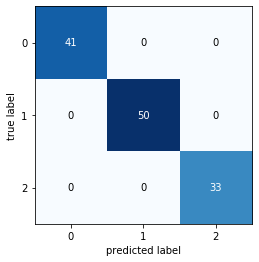

In [94]:
import matplotlib.pyplot as plt
plot_confusion_matrix(conf_mat)
plt.show()

In [95]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

In [96]:
forest.fit(X_train, y_train)
importances = forest.feature_importances_

In [100]:
indices = np.argsort(importances)[::-1]

In [101]:
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.172994
 2) Proline                        0.154752
 3) Alcohol                        0.138280
 4) Flavanoids                     0.137927
 5) OD280/0D315 of diluted wines   0.120440
 6) Hue                            0.083862
 7) Total phenols                  0.046418
 8) Magnesium                      0.034068
 9) Alcalinity of ash              0.031147
10) Malic acid                     0.028834
11) Proanthocyanis                 0.025277
12) Ash                            0.014972
13) Nonflavanoid phenols           0.011029


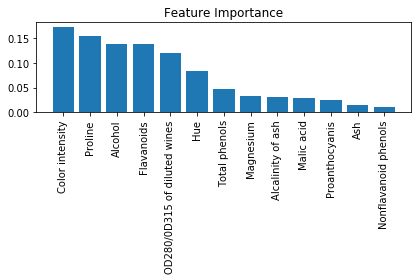

In [107]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [108]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)

In [109]:
print('Number of features meet this threshold', 
     'criterion:', X_selected.shape[1])

Number of features meet this threshold criterion: 5


In [110]:
for f in range(X_selected.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.172994
 2) Proline                        0.154752
 3) Alcohol                        0.138280
 4) Flavanoids                     0.137927
 5) OD280/0D315 of diluted wines   0.120440


In [118]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train_std, y_train, X_test_std, y_test, lr)

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.07407407407407407,
  0.07407407407407407,
  0.05555555555555555,
  0.018518518518518517,
  0.018518518518518517,
  0.018518518518518517,
  0.037037037037037035,
  0.018518518518518517,
  0.018518518518518517,
  0.018518518518518517])

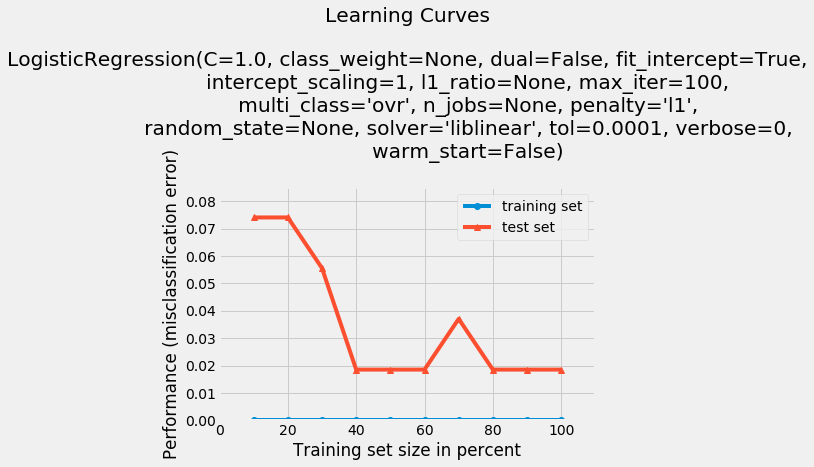

In [119]:
plt.show()